### 1. 문제정의
    - 영화리뷰데이터를 활용해서 긍정, 부정 감성 분석 진행하자!
        - 감성분석이란?
        - 특정 주제에 대한 글의 감성 태도를 파악하는 것 (긍정 / 부정)
    - 텍스트 데이터를 다루는 방법에 대해서 이해해보자!

In [2]:
# 파일불러오는 방법
from sklearn.datasets import load_files
import numpy as np
import pandas as pd

In [3]:
# 파일 불러오기
data_url = 'data/aclImdb/train/'
rv_train = load_files(data_url,shuffle=True)
rv_train

{'data': [b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.",
  b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are s

In [4]:
# bunch 객체 : 머신러닝 자료구조 중 하나로 딕셔너리 처럼 사용가능
# key:value
# 데이터 추출을 위해 key값을 활용하기!

# 리뷰데이터의 키값 확인하기!
rv_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
# 문제데이터 가져오기
txt_train = rv_train['data']
# 정답데이터 담아주기
y_train = rv_train['target']

In [6]:
# 정답데이터의 이름 확인하기
rv_train['target_names']
# 0 == neg ("부정")
# 1 == pos ("긍정")

['neg', 'pos']

In [7]:
# 테스트용 데이터불러오기
data_url2 = 'data/aclImdb/test/'
rv_test = load_files(data_url2, shuffle = True)
rv_test

{'data': [b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!",
  b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hopi

In [8]:
# 테스트용 데이터 분리하기
# txt_test: 문제데이터
txt_test = rv_test['data']
# y_test : 정답데이터
y_test = rv_test['target']

In [9]:
len(txt_test)

25000

In [10]:
len(txt_train)

25000

### 텍스트데이터 전처리
    - 불용어(의미없는 단어) 제거
    - 오탈자 띄어쓰기 교정
    - 정제, 정규화 어간추출, 표제어 추출

In [11]:
# 불용어처리
txt_train
# train데이터의 <br> 태그 제거하기!
# 리스트 내부에서 반복문작성하기
# 대입변수명 =[누적하고싶은 결과값 for i in 대상범위]
txt_train = [ i.replace(b'<br />', b'') for i in txt_train]

In [12]:
txt_train

[b"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. Flawed but honest with a terrible honesty.",
 b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (a

In [13]:
txt_test = [ i.replace(b'<br />', b'') for i in txt_test]
txt_test

[b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!",
 b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hoping that it

### 토큰화


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer : 빈도수 기반 벡터화도구
# 오직 띄어쓰기만을 기준으로 하여 단어를 자른 후에 BOW 를 만듦

In [15]:
test_words = ['Hello my name is sunny', 'I love you', 'you are a student', 'I love my self', 'Hello how are you']

In [16]:
# 카운트벡터라이저 객체생성
vect = CountVectorizer()

In [17]:
# 단어사전 구축하기
vect.fit(test_words)

CountVectorizer()

In [18]:
# 단어사전 확인
print(vect.vocabulary_)

{'hello': 1, 'my': 5, 'name': 6, 'is': 3, 'sunny': 9, 'love': 4, 'you': 10, 'are': 0, 'student': 8, 'self': 7, 'how': 2}


In [19]:
# 우리의 문장들을 수치데이터 변경
vect.transform(test_words)

<5x11 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [20]:
# 확인
vect.transform(test_words).toarray()

array([[0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1]], dtype=int64)

- txt_train, txt_test 모두 수치화 진행

In [23]:
# 1. 카운트벡터라이저 객체생성
rv_vect = CountVectorizer()

In [24]:
# 2. 단어사전 구축 (train, test 둘 다 진행)
rv_vect.fit(txt_train)
rv_vect.fit(txt_test)

CountVectorizer()

In [25]:
# 3. 인코딩
X_train = rv_vect.transform(txt_train)
X_test = rv_vect.transform(txt_test)

### 모델링

In [26]:
# 로지스틱회귀모델을 사용하여 긍, 부정
from sklearn.linear_model import LogisticRegression

In [27]:
# 모델 객체생성
logi = LogisticRegression()

In [28]:
# 모델 학습
logi.fit(X_train, y_train)

C:\Users\gjaischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# 모델 평가
logi.score(X_test, y_test)
# 약 86% 의 정확도를 가진다!!

0.86332

- 우리의 리뷰를 작성해서 잘 맞추는지 확인해보자

In [30]:
# 활용 (끔찍한 영화였습니다. 시간과 돈을 낭비했습니다. 필사적으로 Susan을 찾는 것이 Monsters Inc.의 Boo를 만나는 것과 같았습니다)
data = ["This was a horrible movie. It's a waste of time and money. It was like watching Desperately Seeking Susan meets Boo from Monsters Inc."]

In [33]:
# 인코딩 (문자열 리뷰데이터 -> 수치화)
tf_data = rv_vect.transform(data)
tf_data

<1x75018 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [34]:
# 예측
logi.predict(tf_data)

array([0])

In [35]:
data2 =['It seems fun, but it\'s not fun.']
tf_data2 = rv_vect.transform(data2)
logi.predict(tf_data2)

array([1])

##### TF-IDF
    - TF-IDF(Term Frequency - Inverse Document Frequency)
    - 단어의 중요도를 확인할 때 단순 카운트 기반이 아닌 모든 문서를 확인 한 후에 특정 문서에만 자주 등장하는 단어들은 가중치를 부여하는 방식
    - TF : 하나의 문서에 등장하는 횟수
    - DF : 전체의 문서에 등장하는 횟수
    - 결과값이 클수록 중요도가 높은 단어, 결과값이 낮을수록 중요도가 낮은 단어

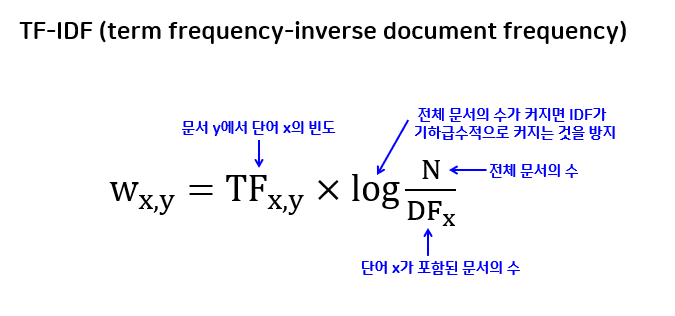

In [36]:
# 도구불러오기
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
corpus = ['I love you',
         'I hate you',
         'you know I want your love',
         'I miss you']

In [38]:
# 객체생성
tfidf_vect = TfidfVectorizer()

In [39]:
# 단어사전 생성
tfidf_vect.fit(corpus)

TfidfVectorizer()

In [41]:
# 단어사전 출력
print(tfidf_vect.vocabulary_)

{'love': 2, 'you': 5, 'hate': 0, 'know': 1, 'want': 4, 'your': 6, 'miss': 3}


In [40]:
# 내부 수치값 출력
tfidf_vect.transform(corpus).toarray()

array([[0.        , 0.        , 0.83388421, 0.        , 0.        ,
        0.55193942, 0.        ],
       [0.88654763, 0.        , 0.        , 0.        , 0.        ,
        0.46263733, 0.        ],
       [0.        , 0.50676543, 0.39953968, 0.        , 0.50676543,
        0.26445122, 0.50676543],
       [0.        , 0.        , 0.        , 0.88654763, 0.        ,
        0.46263733, 0.        ]])